In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, cv2
from sklearn.model_selection import train_test_split

# load data from csv
DATA_DIR = "C://Users//farsu//Unity Games//self-driving-car-simulator//data//training//csv//record_log.csv"
data_df = pd.read_csv (DATA_DIR, names=['left', 'center', 'right', 'steering', 'speed'])
X_paths = data_df[['left', 'center', 'right']].values
y = data_df['steering'].values

print (len(X_paths))

4742


AxesImage(80,52.8;496x369.6)


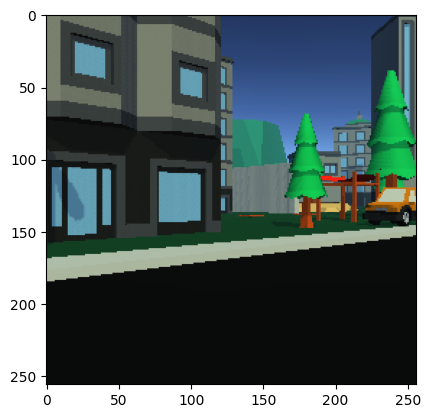

AxesImage(80,52.8;496x369.6)


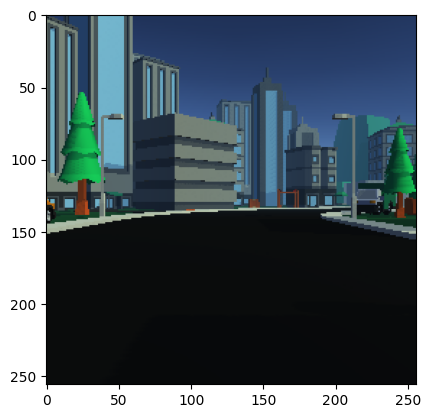

AxesImage(80,52.8;496x369.6)


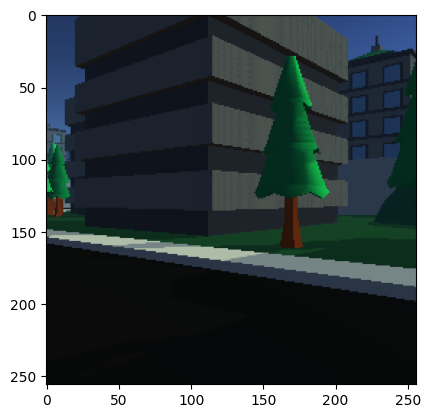

In [2]:
# display image loaded
image = cv2.cvtColor (cv2.imread (X_paths[0][0]), cv2.COLOR_BGR2RGB)
print (plt.imshow (image))
plt.show ()

image = cv2.cvtColor (cv2.imread (X_paths[0][1]), cv2.COLOR_BGR2RGB)
print (plt.imshow (image))
plt.show ()

image = cv2.cvtColor (cv2.imread (X_paths[0][2]), cv2.COLOR_BGR2RGB)
print (plt.imshow (image))
plt.show ()

(256, 256, 3)
AxesImage(80,52.8;496x369.6)


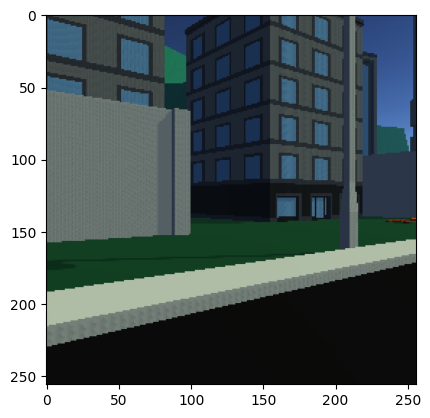

AxesImage(80,52.8;496x369.6)


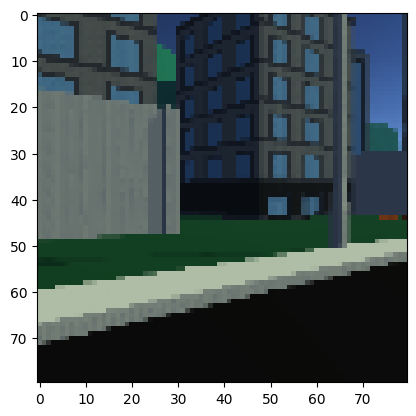

AxesImage(80,52.8;496x369.6)


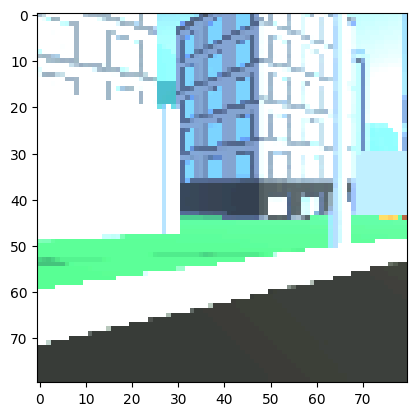

AxesImage(80,52.8;496x369.6)


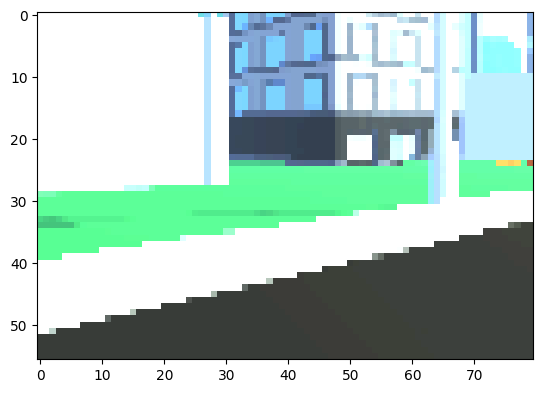

In [3]:
image = cv2.cvtColor (cv2.imread (X_paths[50][0]), cv2.COLOR_BGR2RGB)
print (image.shape)

print (plt.imshow (image))
plt.show ()
image = cv2.resize (image, (80, 80))
print (plt.imshow (image))
plt.show ()
image = cv2.convertScaleAbs(image, alpha=4, beta=20)
print (plt.imshow (image))
plt.show ()
image = image[20:76, :, :]
print (plt.imshow (image))
plt.show ()

In [4]:
# preprocess image
(IMG_WIDTH, IMG_HEIGHT) = (80, 80)

X = [[0, 0, 0]] * len (X_paths)

for i in range (len (X_paths)):
    for j in range (len (X_paths[i])):
        image = cv2.cvtColor (cv2.imread (X_paths[i][j]), cv2.COLOR_BGR2RGB)
        image = cv2.resize (image, (IMG_WIDTH, IMG_HEIGHT))
        image = cv2.convertScaleAbs(image, alpha=4, beta=20)
        # image = image[20:76, :, :]
        image = cv2.cvtColor (image, cv2.COLOR_RGB2YUV)
        X[i][j] = (image)
    

AxesImage(80,52.8;496x369.6)


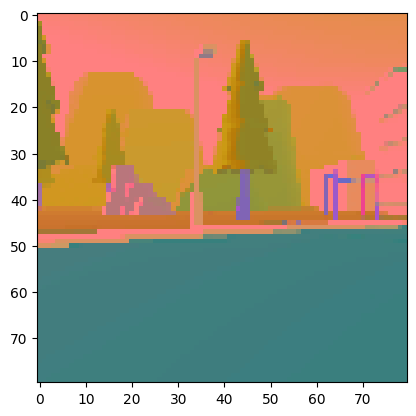

AxesImage(80,52.8;496x369.6)


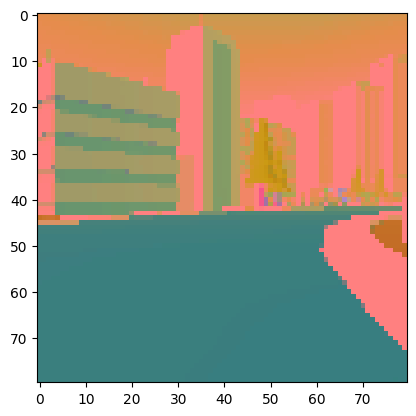

AxesImage(80,52.8;496x369.6)


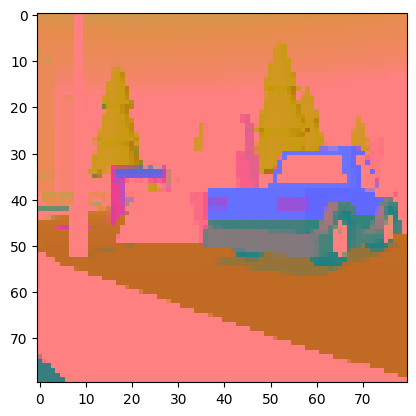

In [5]:
# display preprocessed image
print (plt.imshow (X[50][0]))
plt.show ()

print (plt.imshow (X[50][1]))
plt.show ()

print (plt.imshow (X[50][2]))
plt.show ()

In [6]:
# convert to image array 
X = np.array(X, dtype=object)
y = np.array(y)

# reshape image array
(CROP_WIDTH, CROP_HEIGHT) =  len(X[0][0][0]), len(X[0][0])
for i in range(len(X_paths)):
    for j in range(len(X_paths[i])):
        X[i][j] = np.array(X[i][j]).reshape(-1, CROP_HEIGHT, CROP_WIDTH, 3)
        
print (CROP_WIDTH)
print (CROP_HEIGHT)

80
80


In [7]:
from keras import backend as K
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [8]:
X.shape

(4742, 3, 80, 80, 3)

In [9]:
# build model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda
from keras.optimizers import Adam

X = X/255.0

model = Sequential()
model.add(Lambda(lambda x: x/127.5-1.0, input_shape=X.shape[1:]))
model.add(Conv2D(24, (5, 5), strides=(2, 2), activation='elu'))
model.add(Conv2D(36, (5, 5), strides=(2, 2)))
model.add (Activation ('elu'))
model.add(Conv2D(48, (3, 3), strides=(1, 1)))
model.add (Activation ('elu'))

model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(1))
model.add (Activation ('sigmoid'))

model.summary()

In [ ]:
# compile model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, mode='auto', save_best_only=True)

model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=1.0e-4), metrics=['accuracy'])

In [ ]:
# Training Model
X = np.asarray(X).astype('float32')
history = model.fit(X, y, batch_size=32, epochs=5, validation_split=0.3, callbacks=[checkpoint])

Epoch 1/2
104/104 [==============================] - ETA: 0s - loss: 0.0994 - accuracy: 0.5710
Epoch 1: val_loss improved from inf to 0.09042, saving model to model.h5
104/104 [==============================] - 36s 325ms/step - loss: 0.0994 - accuracy: 0.5710 - val_loss: 0.0904 - val_accuracy: 0.6093
Epoch 2/2
104/104 [==============================] - ETA: 0s - loss: 0.0937 - accuracy: 0.5755
Epoch 2: val_loss did not improve from 0.09042
104/104 [==============================] - 34s 324ms/step - loss: 0.0937 - accuracy: 0.5755 - val_loss: 0.0914 - val_accuracy: 0.6093


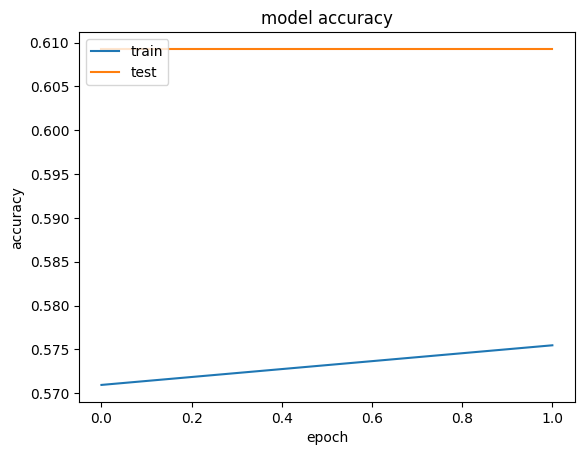

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0, 5, 0, 0.1])
plt.show()

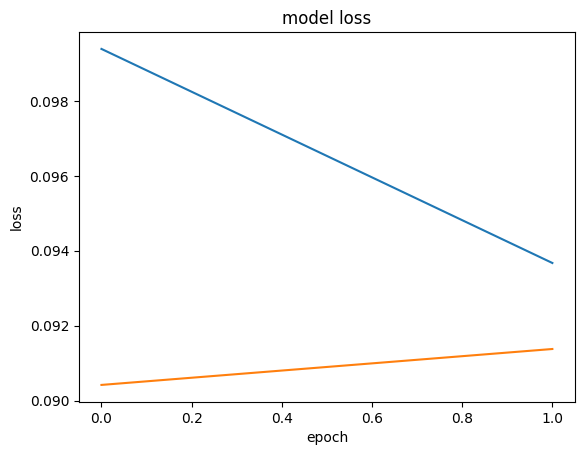

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.axis([0, 5, 0, 1])
plt.show()

In [ ]:
accuracy = model.evaluate(X, y, verbose=0)
print (accuracy)

[0.0927499532699585, 0.5856178998947144]


In [ ]:
import os, cv2
import matplotlib.pyplot as plt
data_dir = "C://Users//farsu//Unity Games//self-driving-car-simulator//data//predict//1//"

(IMG_WIDTH, IMG_HEIGHT) = (80, 80)
data = [[0, 0, 0]]
i = 0

for img in os.listdir (data_dir):
    image = cv2.cvtColor (cv2.imread (os.path.join(data_dir, img)), cv2.COLOR_BGR2RGB)
    image = cv2.resize (image, (IMG_WIDTH, IMG_HEIGHT))
    image = cv2.convertScaleAbs(image, alpha=2, beta=40)
    # image = image[20:76, :, :]
    image = cv2.cvtColor (image, cv2.COLOR_RGB2YUV)
    data[0][i] = (image)
    i += 1

In [ ]:
import numpy as np
data = np.array (data)
print (data[0].shape)
for i in range (3):
    data[0][i] = np.array(data[0][i]).reshape (-1, 80, 80, 3)
data = data/255.0


(3, 80, 80, 3)


In [ ]:
prediction = model.predict (data) # 0.1510853
print (prediction)

1/1 [==============================] - 0s 246ms/step
[[0.22945946]]


In [ ]:
import os, cv2
import matplotlib.pyplot as plt
data_dir = "C://Users//farsu//Unity Games//self-driving-car-simulator//data//predict//2//"

(IMG_WIDTH, IMG_HEIGHT) = (80, 80)
data = [[0, 0, 0]]
i = 0

for img in os.listdir (data_dir):
    image = cv2.cvtColor (cv2.imread (os.path.join(data_dir, img)), cv2.COLOR_BGR2RGB)
    image = cv2.resize (image, (IMG_WIDTH, IMG_HEIGHT))
    image = cv2.convertScaleAbs(image, alpha=2, beta=40)
    # image = image[20:76, :, :]
    image = cv2.cvtColor (image, cv2.COLOR_RGB2YUV)
    data[0][i] = (image)
    i += 1

In [ ]:
import numpy as np
data = np.array (data)
print (data[0].shape)
for i in range (3):
    data[0][i] = np.array(data[0][i]).reshape (-1, 80, 80, 3)
data = data/255.0

(3, 80, 80, 3)


In [ ]:
prediction = model.predict (data) # 0.2381923
print (prediction)

1/1 [==============================] - 0s 43ms/step
[[0.22946802]]


In [ ]:
import os, cv2
import matplotlib.pyplot as plt
data_dir = "C://Users//farsu//Unity Games//self-driving-car-simulator//data//predict//3//"

(IMG_WIDTH, IMG_HEIGHT) = (80, 80)
data = [[0, 0, 0]]
i = 0

for img in os.listdir (data_dir):
    print(os.path.join(data_dir, img))
    image = cv2.cvtColor (cv2.imread (os.path.join(data_dir, img)), cv2.COLOR_BGR2RGB)
    image = cv2.resize (image, (IMG_WIDTH, IMG_HEIGHT))
    image = cv2.convertScaleAbs(image, alpha=2, beta=40)
    # image = image[20:76, :, :]
    image = cv2.cvtColor (image, cv2.COLOR_RGB2YUV)
    data[0][i] = (image)
    i += 1

C://Users//farsu//Unity Games//self-driving-car-simulator//data//predict//3//1 left 25-09 11_43_02.28.png
C://Users//farsu//Unity Games//self-driving-car-simulator//data//predict//3//2 center 25-09 11_43_02.29.png
C://Users//farsu//Unity Games//self-driving-car-simulator//data//predict//3//3 right 25-09 11_43_02.28.png


In [ ]:
import numpy as np
data = np.array (data)
print (data[0].shape)
for i in range (3):
    data[0][i] = np.array(data[0][i]).reshape (-1, 80, 80, 3)
data = data/255.0

(3, 80, 80, 3)


In [ ]:
prediction = model.predict (data) # 0
print (prediction)

1/1 [==============================] - 0s 41ms/step
[[0.22943695]]
